# 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the load_dataset method in seaborn module. The goal will be to use polynomial linear regression to predict tips.

a) Start by doing some initial EDA such as info(), describe().



In [60]:
from seaborn import load_dataset

tips_df = load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


  b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).



In [62]:
tips_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<AxesSubplot:>

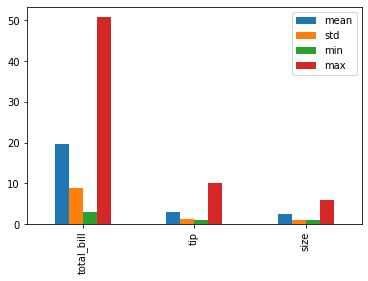

In [63]:
tips_df.describe().T.drop(["count","25%","50%","75%"],axis="columns").plot(kind="bar")

  c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate.



<AxesSubplot:xlabel='day'>

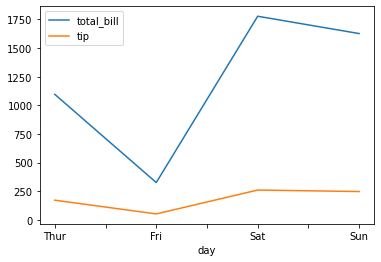

In [64]:
tips_daily_df = tips_df.groupby("day").sum()

tips_daily_df.drop("size",axis="columns").plot(kind="line")

<AxesSubplot:xlabel='time'>

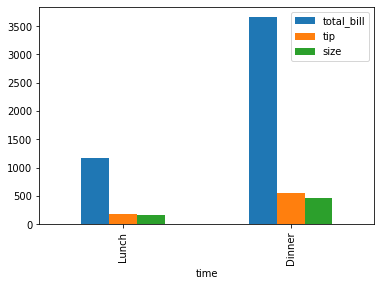

In [65]:
tips_by_meal = tips_df.groupby("time").sum()

tips_by_meal.plot(kind="bar")

<AxesSubplot:xlabel='day'>

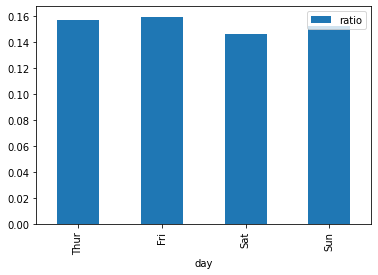

In [66]:
tips_percentage_by_day = tips_df.groupby("day").sum().drop("size",axis="columns")
tips_percentage_by_day["ratio"]=tips_percentage_by_day["tip"]/tips_percentage_by_day["total_bill"]

tips_percentage_by_day.plot(kind="bar",y="ratio")

<AxesSubplot:xlabel='time'>

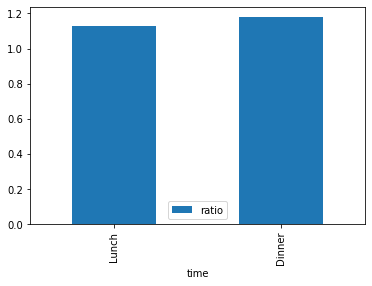

In [67]:
tips_per_person_ratio_per_meal = tips_df.groupby("time").sum().drop("total_bill", axis="columns")

tips_per_person_ratio_per_meal["ratio"] = tips_per_person_ratio_per_meal["tip"]/tips_per_person_ratio_per_meal["size"]
tips_per_person_ratio_per_meal.plot(kind="bar",y="ratio")

  d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

# 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [68]:
from sklearn.model_selection import train_test_split


y_df = tips_df["tip"]
X_df = tips_df.drop("tip",axis="columns")

X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.3,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 6), (74, 6), (170,), (74,))

# 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:
$$ X'_{train} = \frac{X_{train} - \mu _{train}}{\sigma _{train}} $$
$$ X'_{test} = \frac{X_{test} - \mu _{test}}{\sigma _{test}} $$
, where 'denotes scaled, $\mu _{train}$ is the mean of the training data,$ \sigma _{train} $ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of 
 and 
. Is the results as you expect, why, why not?

In [69]:
X_train = X_train[["total_bill","size"]]
X_test = X_test[["total_bill","size"]]

scaled_X_train = (X_train - X_train.mean())/X_train.std()
scaled_X_test = (X_test - X_test.mean())/X_test.std()

# 3. Polynomial features (*)

We want to investigate Polynomialfeatures from scikit-klearn in this task. Start by instantiating an object of type PolynomialFeatures with degree 2. Now do the following:
- use the method fit on $X'_{train}$
- transform $X'_{train}$
- transform $X'_{test}$

Compare this transformed $X'_{test}$ with $X''_{test}$ where  $X''_{test}$ comes from fitting the polynomial features to  $X'_{test}$ and transforming  $X'_{test}$ . You can check directly by using == and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1.

In [70]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import  LinearRegression
import numpy as np

poly = PolynomialFeatures(degree=2, include_bias = False)

poly_X_train = poly.fit(scaled_X_train)
poly_transformed_X_train = poly.transform(scaled_X_train)
poly_transformed_X_test = poly.transform(scaled_X_test)

In [71]:
poly_X_test = poly.fit(poly_transformed_X_test)

poly_transformed_X_test_2 = poly.transform(poly_transformed_X_test)

In [72]:
print(poly_transformed_X_test == poly_transformed_X_test_2)

False


/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_86438/2661267042.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(poly_transformed_X_test == poly_transformed_X_test_2)


# 4. Polynomial regression (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and: 
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X'_{train}$ and $X'_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special?

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from math import sqrt

In [79]:
rmse_df = pd.DataFrame(columns=["Degree","Train_RMSE","Test_RMSE"])

for degree in range(1,5):
    #instantiate an object
    poly = PolynomialFeatures(degree=degree,include_bias=False)

    # fit and tranform 
    poly_X_train = poly.fit(scaled_X_train)
    poly_X_test = poly.fit(scaled_X_test)
    poly_transformed_X_train = poly.transform(scaled_X_train)
    poly_transformed_X_test = poly.transform(scaled_X_test)

    #polynomial regressoin 
    model = LinearRegression()
    model.fit(poly_transformed_X_train,y_train)

    #predict on train and test data
    y_train_pred = model.predict(poly_transformed_X_train)
    y_test_pred = model.predict(poly_transformed_X_test)

    #RMSE 
    train_RMSE = sqrt(mean_squared_error(y_train,y_train_pred))
    test_RMSE = sqrt(mean_squared_error(y_test,y_test_pred))

    #adding to dataframe 
    rmse_df = rmse_df.append({"Degree":degree,"Train_RMSE":train_RMSE,"Test_RMSE":test_RMSE},ignore_index=True)

/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_86438/2149240601.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({"Degree":degree,"Train_RMSE":train_RMSE,"Test_RMSE":test_RMSE},ignore_index=True)
/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_86438/2149240601.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({"Degree":degree,"Train_RMSE":train_RMSE,"Test_RMSE":test_RMSE},ignore_index=True)
/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_86438/2149240601.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({"Degree":degree,"Train_RMSE":train_RMSE,"Test_RMSE":test_RMSE},ignore_index=True)
/var/folders/q8/kg4v5m

/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='Degree'>

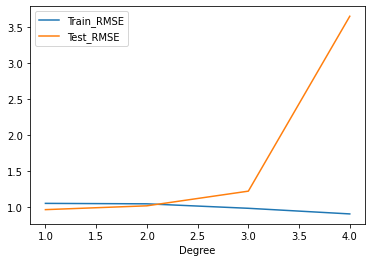

In [83]:
rmse_df.plot(kind="line",x="Degree")

# 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4.
  
a) Use ridge regression with cross-validation and test out different alpha-values. I used $ \alpha = [0.01,0.1,0.5,1,5,10]$ in the cross-validation.
- Check which alpha, that the cross-validation chose as the best one.
- Check the weights.
- Check MAE, MSE, RMSE.
  

In [98]:
# Ridge regression with Cross validation

from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

model_ridgeCV = RidgeCV(alphas = [0.01,0.1,0.5,1,5,10])
model_ridgeCV.fit(poly_transformed_X_train, y_train)
y_pred = model_ridgeCV.predict(poly_transformed_X_test)
print(f"The alpha the CV chose : {model_ridgeCV.alpha_}")
print(f"The weights : {model_ridgeCV.coef_}")

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

print(f"MSE : {MSE}")
print(f"MAE : {MAE}")
print(f"RMSE : {RMSE}")

The alpha the CV chose : 5.0
The weights : [ 0.91469637  0.23893931 -0.67583593  0.20550801 -0.01369317 -0.26007685
  0.31867863 -0.03429744 -0.12484035  0.16000319 -0.18105113  0.24878399
 -0.12692847  0.05002613]
MSE : 4.09474802128119
MAE : 0.9726793444984752
RMSE : 2.0235483738426394


b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations.

- Check which alpha, that the cross-validation chose as the best one.
- Check the weights.
- Check MAE, MSE, RMSE.

In [102]:
# Lasso regression with Cross validation

from sklearn.linear_model import LassoCV

model_lassoCV = LassoCV(eps= 0.001,n_alphas = 100,max_iter = 1e4, cv=5)
model_lassoCV.fit(poly_transformed_X_train, y_train)

print(f"Chosen alpha {model_lassoCV.alpha_}")
print(f"Weights {model_lassoCV.coef_}")

y_pred = model_lassoCV.predict(poly_transformed_X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

print(f"MSE : {MSE}")
print(f"MAE : {MAE}")
print(f"RMSE : {RMSE}")


Chosen alpha 0.20770232166587632
Weights [ 0.23469707  0.         -0.         -0.          0.          0.08814685
  0.09735986  0.          0.03219702  0.          0.          0.
 -0.          0.        ]
MSE : 1.8614850184849174
MAE : 0.9042078936561514
RMSE : 1.3643624952646995


c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $l_1$ ratios for it to try out. I chose $l_1 = [0.001,0.01,0.05,0.1,0.5,0.95,1]$

- Check which alpha, that the cross-validation chose as the best one.
- Check the weights.
- Check MAE, MSE, RMSE.

In [107]:
from sklearn.linear_model import ElasticNetCV

model_elastic = ElasticNetCV(l1_ratio = [0.001,0.01,0.05,0.1,0.5,0.95,1], max_iter=10000)
model_elastic.fit(poly_transformed_X_train, y_train)

print(f"L1 ratio {model_elastic.l1_ratio_}")
print(f"alpha (penalty) {model_elastic.alpha_}")

y_pred = model_elastic.predict(poly_transformed_X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

print(f"MSE : {MSE}")
print(f"MAE : {MAE}")
print(f"RMSE : {RMSE}")

L1 ratio 0.95
alpha (penalty) 0.10148092389050332
MSE : 2.0417765677467883
MAE : 0.8616191586871643
RMSE : 1.4289074734729286
